In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load data
data = pd.read_csv('/content/iris.csv')

# Encode species as labels (0, 1, 2)
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

# Split features and target
X = data.drop('species', axis=1)
y = data['species']

# Normalize features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = tree_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [26]:
from sklearn.cluster import KMeans

# Apply KMeans with 3 clusters (since we know there are 3 Iris species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Cluster labels assigned to each point
cluster_labels = kmeans.labels_


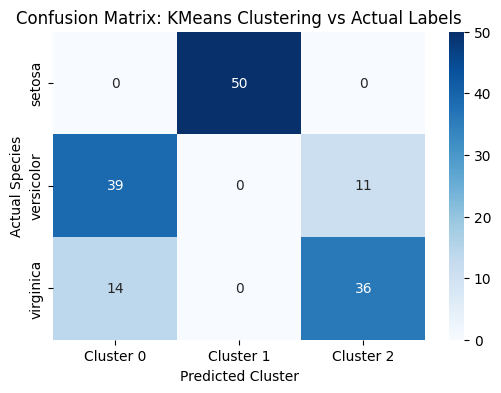

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert actual species to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
true_labels = le.fit_transform(actual_species)

# Confusion matrix
cm = confusion_matrix(true_labels, cluster_labels)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=le.classes_)
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix: KMeans Clustering vs Actual Labels')
plt.show()


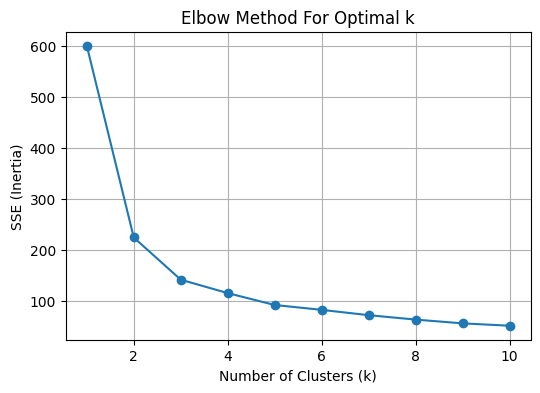

In [25]:
# Elbow method
sse = []  # Sum of Squared Errors
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()


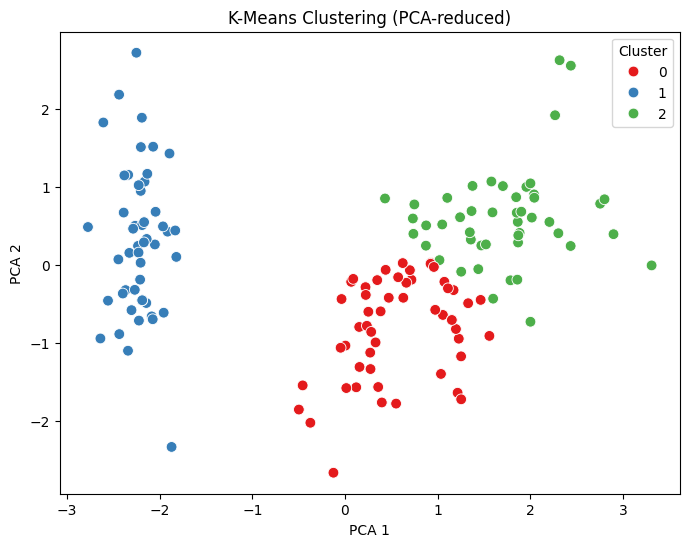

In [27]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='Set1', s=60)
plt.title('K-Means Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()
